# Gentic Algorithm

Một tên trộm vào cửa hàng mang theo chiếc ba lô có trọng lượng 35 kg. Cửa hàng có 10 mặt hàng, mỗi mặt hàng có trọng lượng và giá cụ thể. Bây giờ, vấn đề nan giải của tên trộm là phải lựa chọn các món đồ sao cho giá trị tối đa (tức là tổng giá) mà không vượt quá trọng lượng của ba lô. Chúng ta phải giúp tên trộm thực hiện lựa chọn.

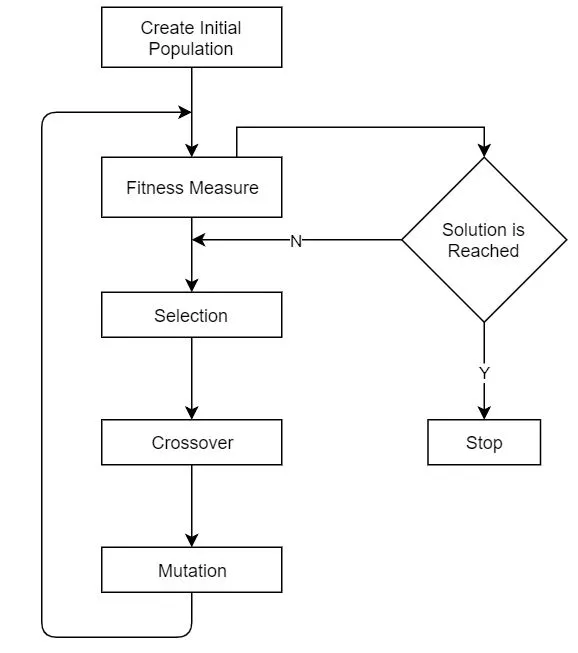

In [31]:
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt

In [32]:
number_of_item = 10 # Số đồ vật
range_of_weight = (1, 15) # Phạm vi cân nặng
range_of_value = (1, 10) # Phạm vi giá trị
knapsack_threshold = 15    # Trọng lượng tối đa mà túi đựng được
num_generations = 50 # Số lượng thế hệ
solutions_per_pop = 8 # Số con tạo ra trong mỗi thế hệ

item_number = np.arange(1,number_of_item + 1) # Để in STT


weight = np.random.randint(range_of_weight[0], range_of_weight[1], size = number_of_item) # Khởi tạo weight
value = np.random.randint(range_of_value[0], range_of_value[1], size = number_of_item) # Khởi tạo value


# In giá trị
print('The list is as follows:')
print('Item No.   Weight   Value')
for i in range(item_number.shape[0]):
    print(f'{item_number[i]}          {weight[i]}         {value[i]}\n')

The list is as follows:
Item No.   Weight   Value
1          2         5

2          13         3

3          13         2

4          2         4

5          5         4

6          6         4

7          3         9

8          8         4

9          8         5

10          9         1



In [33]:
# tuple kích thước (Số con tạo ra trong mỗi thế hệ, số NST = số vật phẩm)
pop_size = (solutions_per_pop,item_number.shape[0]) 
print(f'Population size = {pop_size}')

# Tạo ma trận (dân số ban đầu) - 0 không lấy vật phẩm, 1 lấy vật phẩm
initial_population = np.random.randint(2, size = pop_size) 
initial_population = initial_population.astype(int)


print('Initial population: \n{}'.format(initial_population))

Population size = (8, 10)
Initial population: 
[[1 0 0 0 0 1 0 0 1 0]
 [1 1 1 0 0 1 0 0 1 0]
 [0 1 0 0 0 0 0 1 1 1]
 [1 1 0 1 0 0 1 0 0 1]
 [0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 0 1 0 1 1]
 [0 0 1 1 1 0 0 1 0 1]
 [1 0 0 0 1 1 1 0 0 0]]




>   **Hàm thích nghi (cost function): 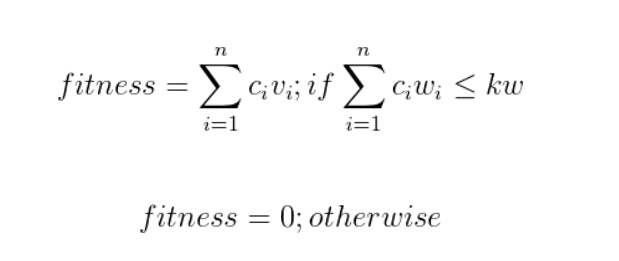**

In [34]:
def cal_fitness(weight, value, population, threshold):
    '''
    Tính cost function (tính giá trị thích nghi)
    
    - weight: mảng trọng lượng vật phẩm
    
    - value: mảng giá trị vật phẩm
    
    - population: Ma trận chứa quần thể các cá thể. 
        => Mỗi hàng của ma trận này biểu diễn một cá thể và mỗi cột biểu diễn việc 
        chọn (1) hoặc không chọn (0) vật phẩm tương ứng.

    - threshold: Trọng lượng tối đa mà cái túi có thể chứa.
    
    '''
    num_individual = population.shape[0]
    
    fitness = np.empty(num_individual) # Tạo mảng lưu giá trị thích nghi (cost) của từng cá thể
    
    for i in range(num_individual):
        S_val = np.sum(population[i] * value) # Tính tổng giá trị vật phẩm chọn (label: 1)      \ => trong một cá thể
        S_wei = np.sum(population[i] * weight) # Tính tổng trọng lượng vật phẩm chọn (label: 1) |
        
        # Nếu tổng trọng lượng < max weight của túi thì: cost cá thể i = S_val, còn không thì sẽ = 0
        if S_wei <= threshold:
            fitness[i] = S_val
        else :
            fitness[i] = 0

    return fitness.astype(int)     

In [35]:
def selection(fitness, num_parents, population):
    '''
    Chọn lọc các cá thể cha mẹ từ quần thể dựa trên giá trị thích nghi của từng cá thể.
    
    - fitness: mảng chứa giá trị cost của từng cá thể
    - num_parents: Số lượng cá thể cha mẹ chọn lọc từ quần thể
    - population: ma trận quần thể
    
    '''
    fitness = list(fitness)
    
    
    # Tạo một ma trận parents để lưu trữ các cá thể cha mẹ được chọn lọc. 
    # Kích thước (số lượng cá thể cha mẹ cần chọn, số vật phẩm)
    parents = np.empty((num_parents, population.shape[1]))
#     print("Parents:\n", parents)
    
    '''
    
    Nếu num_parents = 3
    parents = 
    [[?. ?. ?. ?. ?. ?. ?. ?. ?. ?.]
     [?. ?. ?. ?. ?. ?. ?. ?. ?. ?.]
     [?. ?. ?. ?. ?. ?. ?. ?. ?. ?.]]
    
    '''
    
    for i in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        
        '''
            max_fitness_idx: Max: (array([5], dtype=int64),)
                            Max: (array([1], dtype=int64),)
                            Max: (array([7], dtype=int64),)
        '''
        # Lấy cá thể có fitness đầu tiên
        parents[i,:] = population[max_fitness_idx[0][0], :]
        
        # Gán lại fitness cá thể này là âm vô cùng để lần sau không chọn trúng
        fitness[max_fitness_idx[0][0]] = -999999
    
    '''
    Các cá thể cha mẹ được chọn:
    [[1. 1. 1. 1. 0. 1. 0. 1. 1. 0.]
     [0. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
     [1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]]
     
    '''
        
    return parents

# =============Test hàm =================

# fitness = np.array([20, 45, 25, 30, 18, 50, 32, 34])  # Giá trị thích nghi của các cá thể trong quần thể
# num_parents = 3                     # Số lượng cá thể cha mẹ cần chọn
# population = np.array([[0, 1, 0, 1, 1, 1, 0, 1, 0, 1],
#                          [0, 1, 1, 0, 1, 1, 1, 0, 1, 0],
#                          [0, 0, 1, 0, 1, 1, 1, 1, 0, 1],
#                          [1, 0, 1, 0, 0, 1, 0, 1, 1, 1],
#                          [0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
#                          [1, 1, 1, 1, 0, 1, 0, 1, 1, 0],
#                          [1, 0, 1, 1, 1, 0, 0, 1, 0, 0],
#                          [1, 1, 0, 0, 1, 0, 0, 0, 0, 0]])

# # Gọi hàm selection
# selected_parents = selection(fitness, num_parents, population)

# # In kết quả
# print("Các cá thể cha mẹ được chọn:")
# print(selected_parents)

> **Phương pháp lai ghép 1 điểm cắt:** 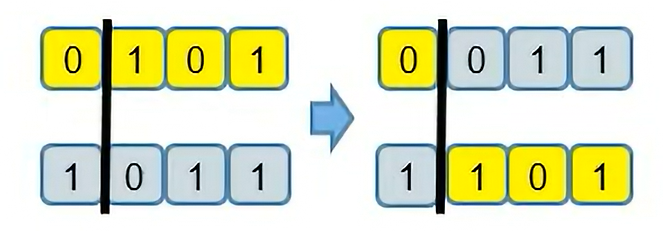

In [36]:
def crossover(parents, num_offsprings):
    '''
    Sử dụng để tạo ra các cá thể con (offsprings) từ các cá thể cha mẹ (parents) bằng phép lai ghép (crossover)
    
    - parents: ma trận cá thể cha mẹ
    - num_offsprings: số lượng cá thể con cần tạo ra
    
    '''
    
    # Ma trận offsprings kích thước (num_offsprings, số vật phẩm) . Ma trận này sẽ chứa các cá thể con được tạo ra.
    offsprings = np.empty((num_offsprings, parents.shape[1]))
    
    # Xác định điểm cắt (crossover point) bằng cách chia đôi số chiều của cá thể cha mẹ.
    crossover_point = int(parents.shape[1]/2)
    
    # Tỷ lệ lai ghép (crossover rate). Trong trường hợp tỷ lệ này là 0.8, nghĩa là có 80% khả năng lai ghép xảy ra.
    crossover_rate = 0.8
    
    # Số lượng cá thể con đã tạo
    i = 0
    
    while (parents.shape[0] < num_offsprings): # Run đến khi nào số lượng cá thể cha mẹ >= số lượng cá thể con sinh ra
        
        # Lấy từng chỉ mục của cha ra để ghép ví dụ: (0, 1), (1, 2), ...
        parent1_index = i % parents.shape[0]
        parent2_index = (i+1) % parents.shape[0]
        x = rd.random()
        if x > crossover_rate:
            continue
        # Tạo cá thể con thứ i có đặc trưng của parent1 và parent 2
        offsprings[i,0:crossover_point] = parents[parent1_index,0:crossover_point]
        offsprings[i,crossover_point:] = parents[parent2_index,crossover_point:]
        i=+1
    return offsprings    

In [37]:
def mutation(offsprings):
    '''
    Thực hiện việc đột biến trên các cá thể con
    
    '''
    # Tạo một ma trận mutants có cùng kích thước với ma trận offsprings để lưu các cá thể mutant.
    mutants = np.empty((offsprings.shape))
    
    # Xác định tỷ lệ đột biến (mutation rate). Trong trường hợp này, tỷ lệ này là 0.4, nghĩa là có 40% khả năng đột biến.
    mutation_rate = 0.4
    
    # Duyệt qua từng cá thể trong ma trận offsprings để xem liệu cá thể đó có bị đột biến hay không.
    for i in range(mutants.shape[0]):
        # Tạo một giá trị ngẫu nhiên trong khoảng từ 0 đến 1 để kiểm tra xem có đột biến hay không.
        random_value = rd.random()
        
        # Sao chép cá thể từ offsprings sang mutants.
        mutants[i, :] = offsprings[i, :]
        
        # Kiểm tra xem random_value có lớn hơn mutation_rate không.
        if random_value > mutation_rate:
            continue
        
        # Nếu random_value nhỏ hơn hoặc bằng mutation_rate, thực hiện đột biến trên cá thể mutants.
        # Chọn một vị trí ngẫu nhiên trong cá thể và đảo ngược giá trị tại vị trí đó (0 thành 1 hoặc 1 thành 0).
        int_random_value = randint(0, offsprings.shape[1] - 1)
        if mutants[i, int_random_value] == 0:
            mutants[i, int_random_value] = 1
        else:
            mutants[i, int_random_value] = 0
    
    # Trả về ma trận mutants chứa các cá thể mutant sau khi đột biến.
    return mutants


In [38]:
def optimize_gentic_algorithm(weight, value, population, pop_size, num_generations, threshold):
    
    '''
    Gentic Algorithm
    
    '''
    # Khởi tạo danh sách để lưu trữ thông tin về các thế hệ và giá trị tối ưu
    parameters, fitness_history = [], []
    
    # Số lượng cha mẹ được chọn trong mỗi thế hệ (là một phần của quần thể)
    num_parents = int(pop_size[0] / 2) # Số cha mẹ tạo ra trong mỗi thế hệ / 2 = 4
    
    # Số lượng cá thể con cần tạo ra trong mỗi thế hệ
    num_offsprings = pop_size[0] - num_parents 
    
    # Vòng lặp qua từng thế hệ
    for i in range(num_generations):
        # Tính toán giá trị thích nghi của từng cá thể trong quần thể hiện tại
        fitness = cal_fitness(weight, value, population, threshold)
        
        # Lưu giá trị thích nghi của thế hệ hiện tại vào danh sách lịch sử thích nghi
        fitness_history.append(fitness)
        
        # Chọn ra các cha mẹ từ quần thể hiện tại
        parents = selection(fitness, num_parents, population)
        
        # Tạo ra cá thể con (offsprings) bằng cách lai ghép giữa các cha mẹ
        offsprings = crossover(parents, num_offsprings)
        
        # Thực hiện đột biến trên các cá thể con
        mutants = mutation(offsprings)
        
        # Cập nhật quần thể mới bằng cách thay thế một phần cha mẹ bằng cá thể con và mutant
        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = mutants
        
    # In ra quần thể cuối cùng sau khi tối ưu
    print('Last generation: \n{}\n'.format(population)) 
    
    # Tính toán giá trị thích nghi của quần thể cuối cùng
    fitness_last_gen = cal_fitness(weight, value, population, threshold)      
    print('Fitness of the last generation: \n{}\n'.format(fitness_last_gen))
    
    # Xác định các tham số tối ưu từ cá thể có giá trị thích nghi cao nhất
    max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
    parameters.append(population[max_fitness[0][0],:])
    
    # Trả về danh sách tham số tối ưu và lịch sử thích nghi
    return parameters, fitness_history


In [39]:
parameters, fitness_history = optimize_gentic_algorithm(weight, value, initial_population, pop_size, num_generations, knapsack_threshold)
print('The optimized parameters for the given inputs are: \n{}'.format(parameters))

selected_items = item_number * parameters # Chuyển NST về số thứ tự vật phẩm
print('\nSelected items that will maximize the knapsack without breaking it:')
for i in range(selected_items.shape[1]):
    if selected_items[0][i] != 0:
        print(f'Vật phẩm {selected_items[0][i]}: weight: {weight[i]}, value: {value[i]}\n')

Last generation: 
[[1 0 0 1 0 1 1 0 0 0]
 [1 0 0 1 0 1 1 0 0 0]
 [1 0 0 1 0 1 1 0 0 0]
 [1 0 0 1 0 1 1 0 0 0]
 [1 0 0 1 0 1 1 0 0 0]
 [1 0 0 1 0 1 1 0 0 0]
 [1 0 0 1 0 1 1 0 0 0]
 [1 0 0 1 0 1 1 0 0 0]]

Fitness of the last generation: 
[22 22 22 22 22 22 22 22]

The optimized parameters for the given inputs are: 
[array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0])]

Selected items that will maximize the knapsack without breaking it:
Vật phẩm 1: weight: 2, value: 5

Vật phẩm 4: weight: 2, value: 4

Vật phẩm 6: weight: 6, value: 4

Vật phẩm 7: weight: 3, value: 9



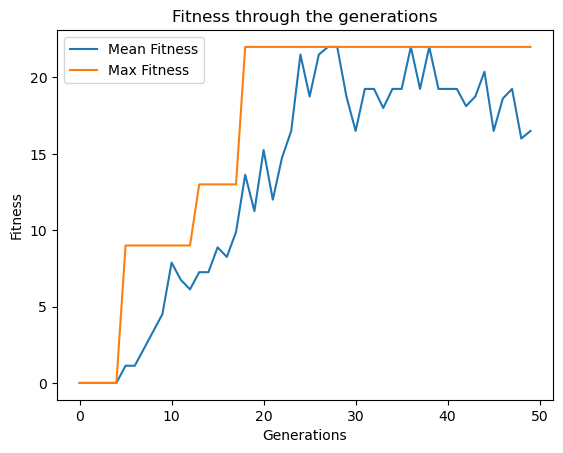

(50, 8)


In [40]:
fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Mean Fitness')
plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
plt.legend()
plt.title('Fitness through the generations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()
print(np.asarray(fitness_history).shape)